In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

# Data Loading and Cleaning

In [18]:
pd.set_option('display.max_columns', 500)
raw = pd.read_csv('cancer_reg.csv', encoding='ISO-8859-1').drop(columns=['Geography'])
raw

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,41.1,48.8,2.08,51.0,20.9,27.9,NaN,8.4,32.2,15.2,51.7,4.3,78.3,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,29.3,31.4,2.90,52.6,26.7,33.9,35.6,3.8,23.1,12.4,70.1,4.6,64.5,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,30.5,31.2,3.04,54.8,19.7,44.5,33.3,2.5,23.0,12.8,64.8,6.4,62.0,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,36.9,40.5,2.56,58.8,10.9,37.2,NaN,4.1,36.1,14.4,NaN,6.9,75.9,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [19]:
raw.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

### Missing Values

In [20]:
print(raw.isnull().sum()[raw.isnull().sum() > 0])

PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64


For all three of these columns, we will deal with the missing values through imputation, specifically mean substitution. Only numerical columns had missing values, so we don't need to deal with any categorical imputation.

In [21]:
columns_to_impute = ['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone']
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(raw[columns_to_impute])
raw[columns_to_impute] = imp.transform(raw[columns_to_impute])
print(raw.isnull().sum()[raw.isnull().sum() > 0])

Series([], dtype: int64)


### Standardization and Encoding

In [22]:
categorical_cols = ['binnedInc']
categorical_data = raw[categorical_cols]
numerical_data = raw.drop(columns=categorical_cols)

In [23]:
categorical_data

,binnedInc
0,"(61494.5, 125635]"
1,"(48021.6, 51046.4]"
2,"(48021.6, 51046.4]"
3,"(42724.4, 45201]"
4,"(48021.6, 51046.4]"
...,...
3042,"(45201, 48021.6]"
3043,"(48021.6, 51046.4]"
3044,"(51046.4, 54545.6]"
3045,"(48021.6, 51046.4]"


We will start by standardizing/normalizing the continuous variables. We will standardize the ones with that follow a normal distribution, and normalize the ones that don't follow a normal distribution. Below I have plotted the distributions, we will check normality with a Shapiro Wilk test.

In [24]:
normal_columns=[]
non_normal_columns=[]
for column in numerical_data.columns:
    stat, p = stats.shapiro(numerical_data[column])
    if p > 0.05:
        normal_columns.append(column)
    else:
        non_normal_columns.append(column)

print("Normal Columns:", normal_columns)
print("Non-Normal Columns:", non_normal_columns)

Normal Columns: ['PctPublicCoverage']
Non-Normal Columns: ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


In [25]:
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
numerical_data[normal_columns] = scaler.fit_transform(numerical_data[normal_columns])
numerical_data[non_normal_columns] = minmax_scaler.fit_transform(numerical_data[non_normal_columns])

### One Hot Encoding

In [26]:
encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
categorical_data = encoder.fit_transform(categorical_data)

In [27]:
scaled_data = pd.concat([numerical_data, categorical_data], axis=1)
X = scaled_data[ scaled_data.columns[scaled_data.columns!='TARGET_deathRate'] ].copy()
y = scaled_data[['TARGET_deathRate']].copy()

### Collinearity

In [28]:
vif = pd.DataFrame([variance_inflation_factor(X[X.select_dtypes("number").columns].values, i) for i in range(X[X.select_dtypes("number").columns].shape[1])], index=X[X.select_dtypes("number").columns].columns, columns=['VIF_value'])
print(vif)

                               VIF_value
avgAnnCount                     9.812240
avgDeathsPerYear               31.808229
incidenceRate                   1.272215
medIncome                      15.309622
popEst2015                     26.594175
povertyPercent                 11.046668
studyPerCap                     1.051506
MedianAge                       1.026885
MedianAgeMale                   9.712753
MedianAgeFemale                10.814972
AvgHouseholdSize                1.383713
PercentMarried                 10.831386
PctNoHS18_24                    1.843429
PctHS18_24                      1.898822
PctSomeCol18_24                 1.362382
PctBachDeg18_24                 2.024862
PctHS25_Over                    3.802865
PctBachDeg25_Over               5.664462
PctEmployed16_Over              5.422676
PctUnemployed16_Over            2.704021
PctPrivateCoverage             18.272180
PctPrivateCoverageAlone         4.766898
PctEmpPrivCoverage              8.052448
PctPublicCoverag

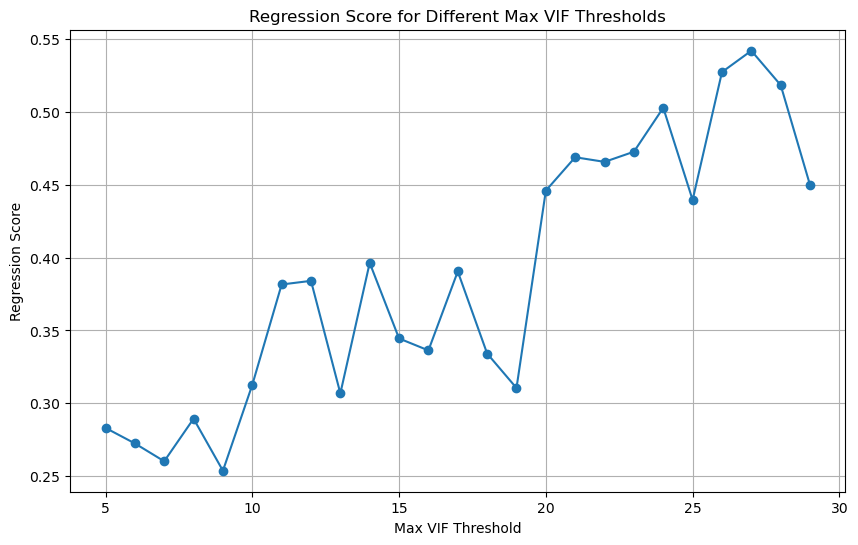

In [29]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF_value"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# Assume X and y are already defined
# Store the original X to reset for each VIF threshold
original_X = X.copy()

max_vif_thresholds = range(5, 30)  # Example range from 5 to 20
scores = []

for max_vif in max_vif_thresholds:
    X = original_X.copy()
    
    while True:
        vif_data = calculate_vif(X)
        max_vif_value = vif_data['VIF_value'].max()
        if max_vif_value > max_vif:
            max_vif_feature = vif_data[vif_data['VIF_value'] == max_vif_value]['feature'].iloc[0]
            X.drop(max_vif_feature, axis=1, inplace=True)
        else:
            break

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    score = regr.score(X_test, y_test)
    scores.append(score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_vif_thresholds, scores, marker='o')
plt.xlabel('Max VIF Threshold')
plt.ylabel('Regression Score')
plt.title('Regression Score for Different Max VIF Thresholds')
plt.grid(True)
plt.show()


In [30]:
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF_value"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data


while True:
    vif_data = calculate_vif(X)
    max_vif = vif_data['VIF_value'].max()
    if max_vif > 15:
        max_vif_feature = vif_data[vif_data['VIF_value'] == max_vif]['feature'].iloc[0]
        print(f"Removing {max_vif_feature} with VIF {max_vif}")
        X.drop(max_vif_feature, axis=1, inplace=True)
    else:
        break

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

final_vif_data = calculate_vif(X)
print(final_vif_data)

regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

Removing PctEmpPrivCoverage with VIF 26.68809416211637
Removing MedianAgeMale with VIF 20.12980409578543
Removing incidenceRate with VIF 19.364016426194908
                         feature  VIF_value
0                    avgAnnCount   8.958198
1                     popEst2015   8.493839
2                    studyPerCap   1.118467
3                      MedianAge   1.267036
4                   PctNoHS18_24   6.862579
5                     PctHS18_24  12.359903
6                PctBachDeg18_24   4.660312
7              PctBachDeg25_Over   9.899931
8           PctUnemployed16_Over   9.633470
9              PctPublicCoverage   2.819631
10                      PctBlack   2.015633
11                      PctAsian   1.951870
12                  PctOtherRace   1.499759
13                     BirthRate   8.902520
14  binnedInc_(34218.1, 37413.8]   2.893806
15  binnedInc_(37413.8, 40362.7]   2.577620
16  binnedInc_(40362.7, 42724.4]   2.376526
17    binnedInc_(42724.4, 45201]   2.178947
18    bi

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [32]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.3273290078386918


In [1]:
strs=["a", "ab", "bac"]
len(reduce(lambda x, y: x if len(x) < len(y) else y, strs))

NameError: name 'reduce' is not defined